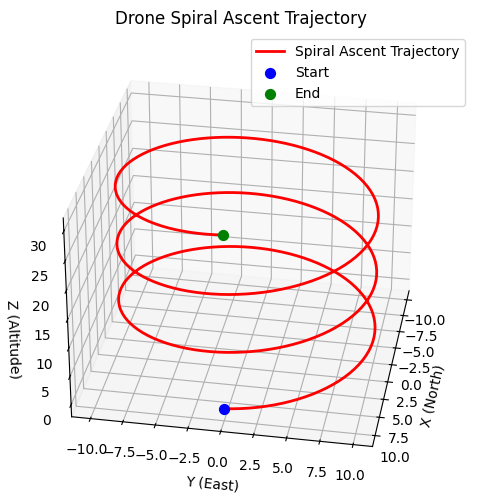

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_turns = 3
radius = 10 
height = 30 
num_points = 300 

t_values = np.linspace(0, 1, num_points)  

theta = 2 * np.pi * num_turns * t_values 
px_values = radius * np.cos(theta) 
py_values = radius * np.sin(theta) 
pz_values = height * t_values  

vx_values = np.gradient(px_values) / np.gradient(t_values)
vy_values = np.gradient(py_values) / np.gradient(t_values)
vz_values = np.gradient(pz_values) / np.gradient(t_values)

yaw_values = np.degrees(theta)  
mode_values = np.full(num_points, 70)  

df = pd.DataFrame({
    "idx": range(num_points),
    "t": t_values * 30, 
    "px": px_values,
    "py": py_values,
    "pz": -pz_values,  
    "vx": vx_values,
    "vy": vy_values,
    "vz": vz_values,
    "ax": np.zeros(num_points), 
    "ay": np.zeros(num_points),
    "az": np.zeros(num_points),
    "yaw": yaw_values,
    "mode": mode_values
})

# csv_filename =  "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv"
# df.to_csv(csv_filename, index=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(px_values, py_values, pz_values, color="red", linewidth=2, label="Spiral Ascent Trajectory")

ax.scatter(px_values[0], py_values[0], pz_values[0], color="blue", s=50, label="Start")
ax.scatter(px_values[-1], py_values[-1], pz_values[-1], color="green", s=50, label="End")

ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Drone Spiral Ascent Trajectory")

ax.view_init(azim=10) 

ax.legend()

plt.show()

# csv_filename